# House price prediction project

# 1. Problem statement

* Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
  market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
  and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
  in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
  focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
  recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
  companies. Our problem is related to one such housing company.

* A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
  data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
  purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
  below.

* The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
  using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
  in them or not. For this company wants to know:
  
   1. Which variables are important to predict the price of variable?
   2. How do these variables describe the price of the house?
   
# 2. Data

* The entire data is provided by the Flip-robo technologies.
* Data has `1460` entries and it has `81` variables.
* I have two datasets:
   1. train.csv (1168 records)
   2. test.csv(292 records)

# 3. Evaluation
* You are required to model the price of houses with the available independent variables. This model will then be used 
  by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
  strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
  management to understand the pricing dynamics of a new market.

# 4. Features

* The entire data description is in file : https://docs.google.com/document/d/1TeuBmSO8SEdJbLfOS7GvsEYzUpYD6ndpVHdlTfF775U/edit
* We have 81 features:
    1. Independent features : 80
    2. Dependent feature : 1 (Sale Price)

# Getting tools ready 

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import math

#importing the preprocessing tools
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

#importing models
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#importing the metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, r2_score

#filter warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows', 81)
df.T.head(81)

,0,1,2,3,4,5,6,7,8,9,...,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167
Id,127,889,793,110,422,1197,561,1041,503,576,...,673,943,551,1301,1381,289,554,196,31,617
MSSubClass,120,20,60,20,20,60,20,20,20,50,...,20,90,120,60,30,20,20,160,70,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RL,RL,...,RL,RL,RL,RL,RL,RL,RL,RL,C (all),RL
LotFrontage,NaN,95,92,105,NaN,58,NaN,88,70,80,...,NaN,42,53,NaN,45,NaN,67,24,50,NaN
LotArea,4928,15865,9920,11751,16635,14054,11341,13125,9170,8480,...,11250,7711,4043,10762,8212,9819,8777,2280,8500,7861
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Grvl,NaN,NaN,NaN,Pave,NaN
LotShape,IR1,IR1,IR1,IR1,IR1,IR1,IR1,Reg,Reg,Reg,...,IR1,IR1,Reg,IR1,Reg,IR1,Reg,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

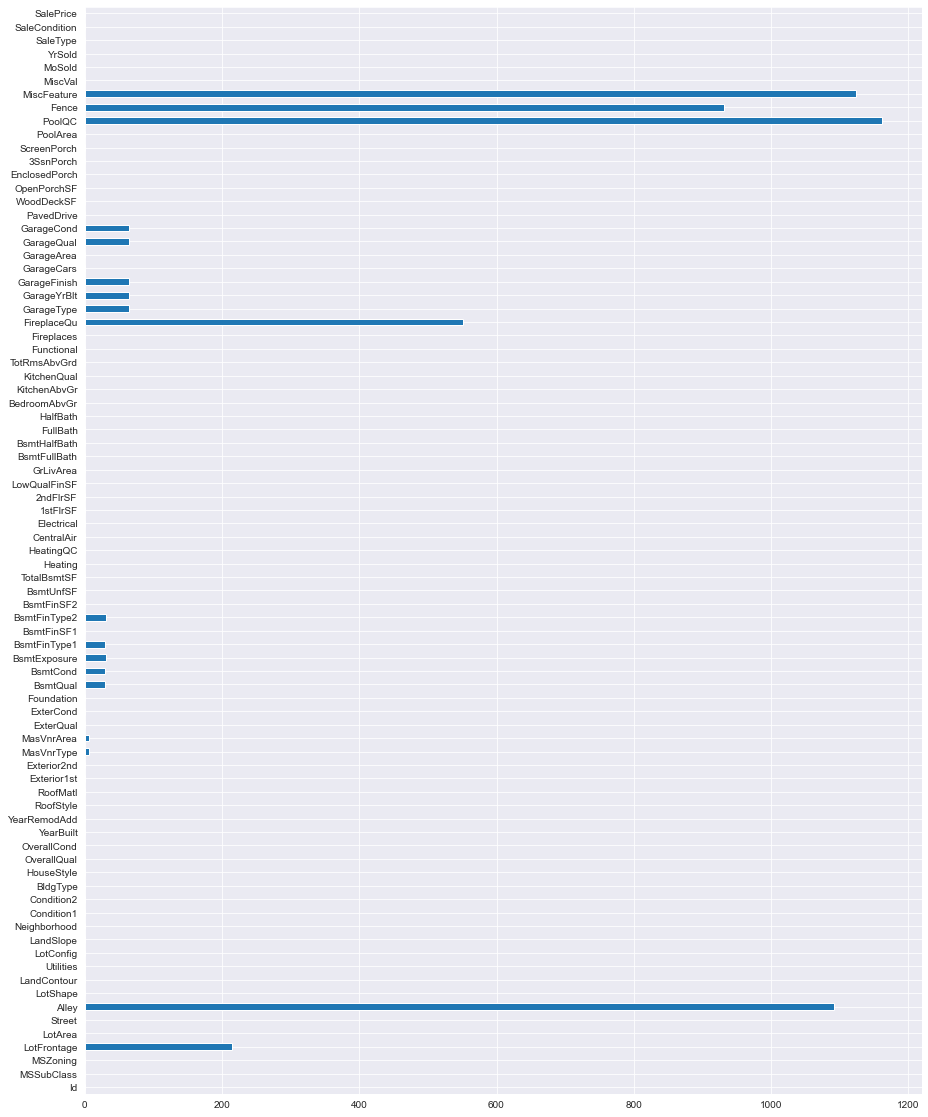

In [4]:
#Checking for missing values
sns.set_style('darkgrid')
plt.figure(figsize = (15, 20))
df.isna().sum().plot.barh();

**WE CAN SEE THAT SOME FEATURES HAVE MORE THAN `40%` OF NAN VALUES LETS DROP THAT FEATURES**

In [5]:
# creating a function which drops the  features which has more than 50% of NAN values
def drop_features(data):
    """
    It drops the features which contains more than `40%` of missing values
    """
    percentage = dict(round(data.isna().sum()/len(data)*100,2))
    for key, values in percentage.items():
        if values > 40:
            print(f'The {key} has {values} % of missing values.')
            data = data.drop(key, axis = 1)
    return data        

In [6]:
df_new = drop_features(df)

The Alley has 93.41 % of missing values.
The FireplaceQu has 47.17 % of missing values.
The PoolQC has 99.4 % of missing values.
The Fence has 79.71 % of missing values.
The MiscFeature has 96.23 % of missing values.


## Filling the missing values using simple imputation technique

In [7]:
df_new.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [10]:
#creating function for filling the values
def fill_values(data):
    """
    Fills all the missing values using simple imputer,Categorical values with the 'most frequent' values,Numerical values with the  'median' values.
    """

    for labels, content in data.items():
         # Filling the missing values of object dtype(categorical) with 'most frequent'
        if pd.api.types.is_object_dtype(content):
            if pd.isnull(content).any():
                Imputer = SimpleImputer(strategy = 'most_frequent')
                data[labels] = Imputer.fit_transform(data[labels].values.reshape(-1,1))[:,0]
        
        # Filling the missing values of the numerical dtype
        else:
            if pd.isnull(content).any():
                Imputer1= SimpleImputer(strategy = 'median')
                data[labels] = Imputer1.fit_transform(data[labels].values.reshape(-1,1))[:,0]
    return data           


In [12]:
df_new = fill_values(df_new)

In [13]:
df_new.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis(EDA)

**DISTRIBUTION OF SALE PRICE IN OUR DATASET**

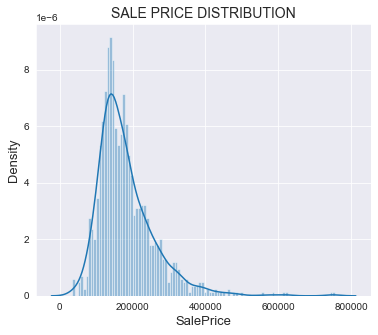

In [14]:
plt.figure(figsize = (6,5))
plt.title('SALE PRICE DISTRIBUTION', fontsize = 14)
plt.xlabel('SalePrice', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
sns.distplot(df_new['SalePrice'],bins = 100);

**OBSERVATION**
> Most of sale price lies between `100000` to `450000`

**HOW NEIGHBORHOOD AFFECTS THE SALE AND THE WHICH NEIGHBORHOOD HAS MORE SALE**

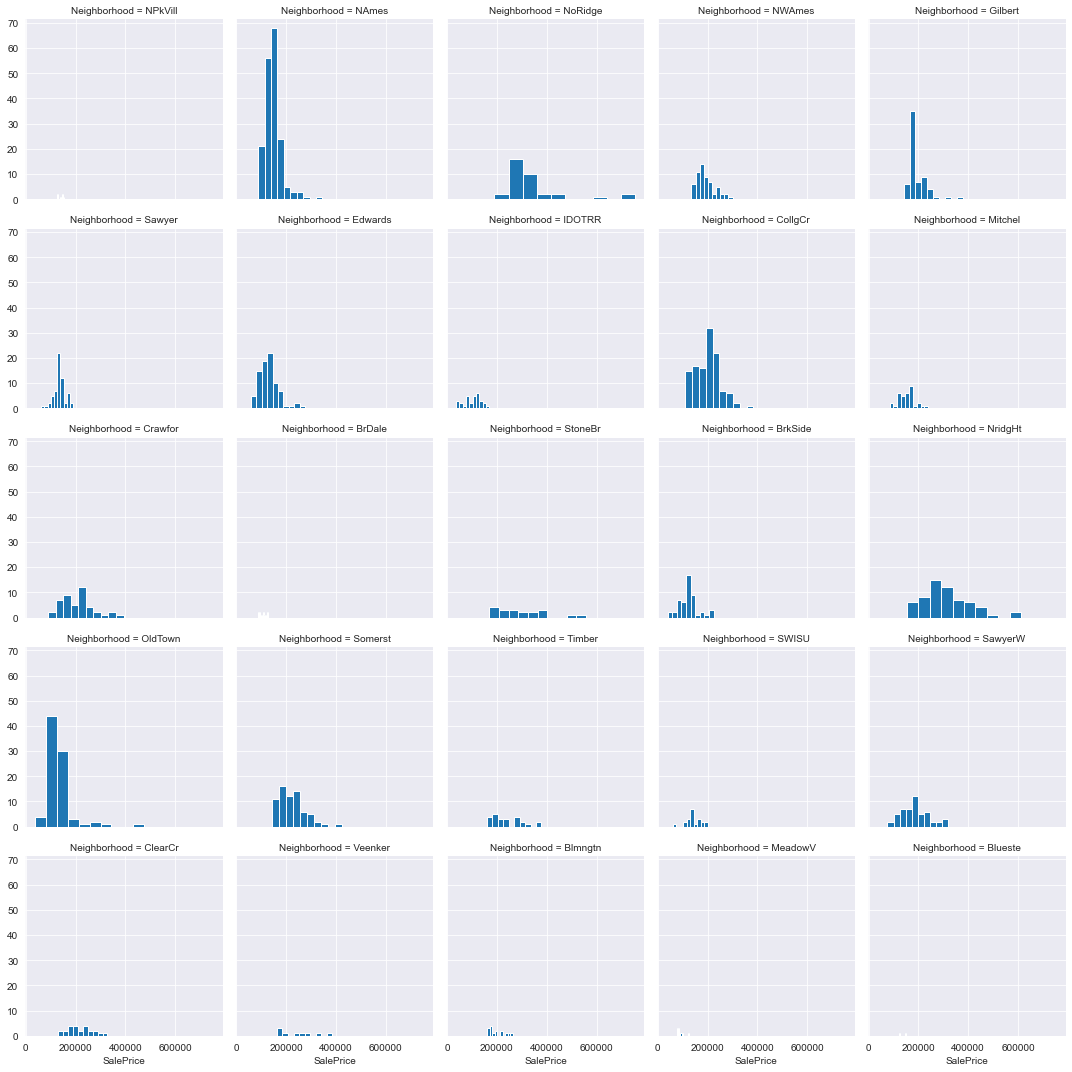

In [15]:
fig = sns.FacetGrid(df_new, col = 'Neighborhood' , col_wrap = 5)
fig.map(plt.hist, 'SalePrice');

**OBSERVATION**
* 1. Neighborhood like `NAmes, Collgcr, oldtown` has sale price between `150000` and `250000`.
* 2. Neighborhood `Nridght` has more spread of sale price.
* 3. All the other neighborhood has less number of sale

**WHICH SUBCLASS HAS MORE SALE IN OUR DATASET**

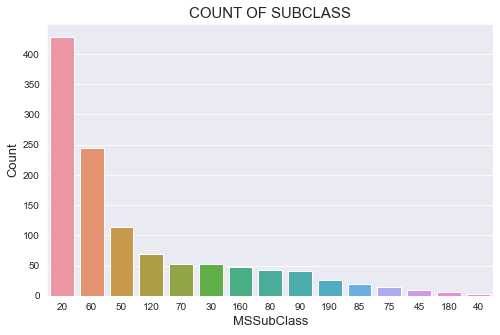

In [16]:
plt.figure(figsize = (8,5))
sns.countplot(df_new['MSSubClass'], order = df_new.MSSubClass.value_counts().index)
plt.xlabel('MSSubClass',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
plt.title('COUNT OF SUBCLASS', fontsize = 15);

**OBSERVATION**
* 1. subclass `20` has more number of sales (around 450) which is `1-STORY 1946 & NEWER ALL STYLES`
* 2. The second highest sale (approx 240) is in `60` which is `2-STORY 1946 & NEWER`
* 3. The least sale is in `40`(5 to 10) which is `1-STORY W/FINISHED ATTIC ALL AGES`

**WHICH ZONE MORE NUMBER OF SALES IN OUR DATA**

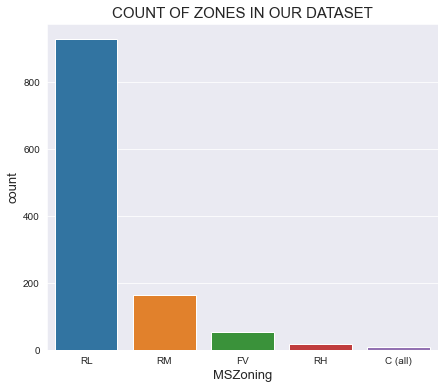

In [17]:
plt.figure(figsize = (7,6))
plt.xlabel('MSZoning', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('COUNT OF ZONES IN OUR DATASET', fontsize = 15)
sns.countplot(df_new['MSZoning']);

**OBSERVATION**
* 1.`RL` has more number of sale (around 700) 
* 2.The second least sale `RM` (around 180)
* 3.The least number of sale is `C(all)`

**SPREAD OF SALEPRICE IN ZONE `RL`**

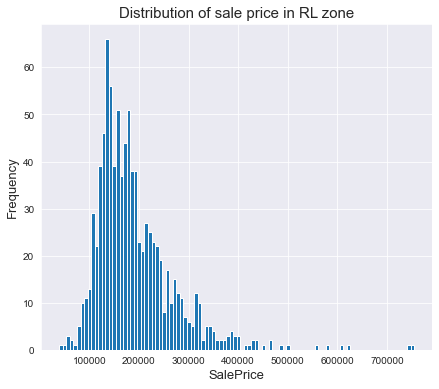

In [18]:
plt.figure(figsize = (7,6))
plt.xlabel('SalePrice', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.title('Distribution of sale price in RL zone', fontsize = 15)
df_new[df_new['MSZoning'] == 'RL']['SalePrice'].plot.hist(bins = 100);

**OBSERVATION**
* 1. The price range falls between `100000` and `450000`

**SPREAD OF DATA OVER ALL ZONES**

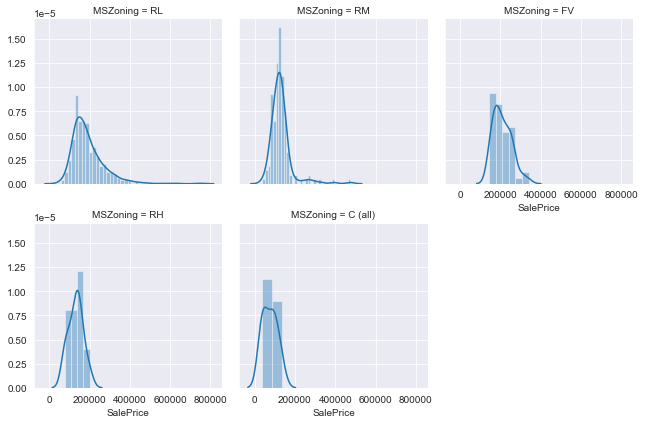

In [19]:
fig = sns.FacetGrid(df_new, col = 'MSZoning', col_wrap = 3)
fig.map(sns.distplot, 'SalePrice');

**OBSERVATION**
* 1. Most of the sale price for all types of zones lies between `100000` and `200000`

**COUNT OF DIFFERENT TYPES OF HOUSES IN DIFFERENT ZONES**

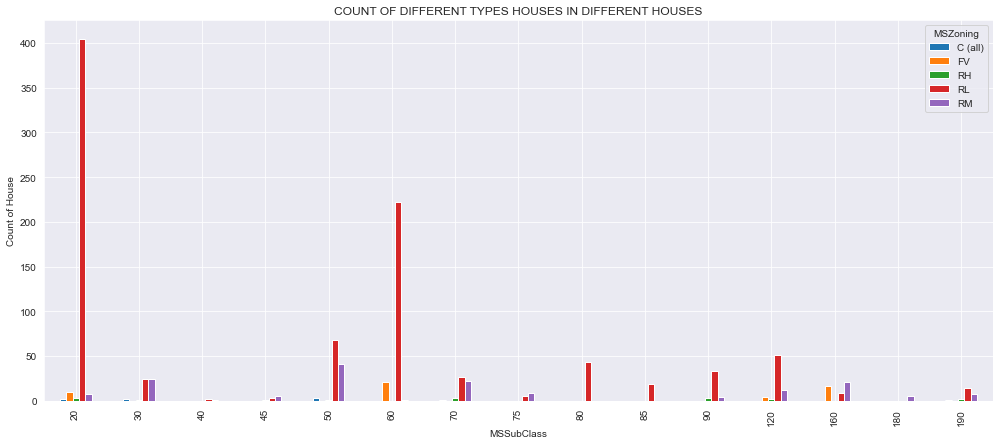

In [20]:
cross = pd.crosstab(df_new.MSSubClass, df_new.MSZoning)
cross.plot(kind = 'bar', figsize = (17,7), title = 'COUNT OF DIFFERENT TYPES HOUSES IN DIFFERENT HOUSES', ylabel = 'Count of House',  legend = True);

* Full form of Zones                                            

   A  -	Agriculture                                              
   C  -	Commercial                                               
   FV - Floating Village Residential                             
   I  -	Industrial                                               
   RH - Residential High Density                                 
   RL - Residential Low Density                                 
   RP - Residential Low Density Park                             
   RM - Residential Medium Density 
   

* Subclass
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

           

**OBSERVATION**
1. Zone `RL`(Residential low density) has more number of (around 410) subclass 20 and (around 220) subclass
2. All the other zones has quite less of amount of subclasses in them

**IMPACT OF STREETS ON SALE PRICE**

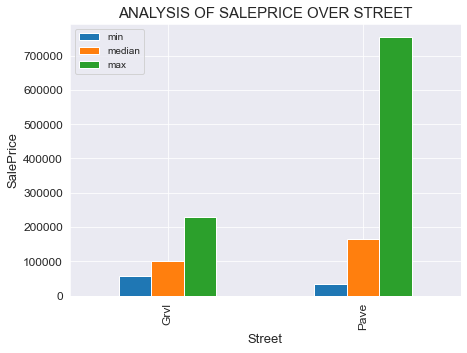

In [21]:
df_new.groupby('Street')['SalePrice'].agg(['min','median','max']).plot(kind = 'bar',figsize = (7,5),fontsize = 12)
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('Street', fontsize = 13)
plt.title('ANALYSIS OF SALEPRICE OVER STREET', fontsize = 15);

**OBSERVATION**
1. Street type `Pave` has more price value when compared to `Grvl`

**VISUALIZATION OF WHICH LOTSHAPE HAS MORE SALE**

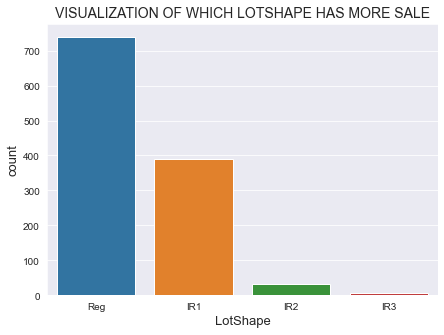

In [22]:
plt.figure(figsize = (7, 5))
plt.xlabel('Lotshape', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('VISUALIZATION OF WHICH LOTSHAPE HAS MORE SALE' , fontsize = 14)
sns.countplot(df_new['LotShape'], order = df_new['LotShape'].value_counts().index);

**OBSERVATION**
* 1. Lotshape `Reg` has more number (around 750) in sale
* 2. Lotshape `IR3` has the least number of sale.

**VISUALIZATION OF BUILDING TYPE WHICH HAS MORE SALE**

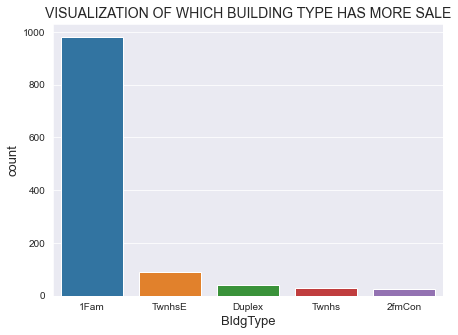

In [23]:
plt.figure(figsize = (7, 5))
plt.xlabel('BUILDINGTYPE', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('VISUALIZATION OF WHICH BUILDING TYPE HAS MORE SALE' , fontsize = 14)
sns.countplot(df_new['BldgType'], order = df_new['BldgType'].value_counts().index);

**OBSERVATION**

In [24]:
print(f"The Highest sale of Building type *1Fam* has {round(len(df_new[df_new['BldgType'] == '1Fam'])/(len(df_new['BldgType']))*100,2)}% of sale")
print(f"The least sale of building type *2fmCon* has {round(len(df_new[df_new['BldgType'] == '2fmCon'])/(len(df_new['BldgType']))*100,2)}% of sale")

The Highest sale of Building type *1Fam* has 83.99% of sale
The least sale of building type *2fmCon* has 2.31% of sale


**VISUALIZATION OF WHICH ZONE AND NEIGHBORHOOD HAS BUILDING PRICE MORE THAN  400000**

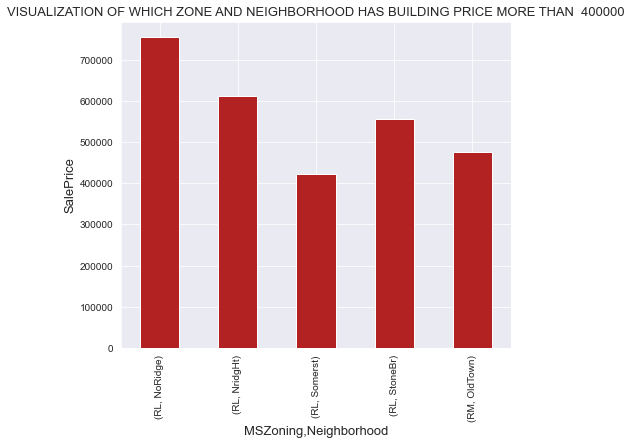

In [25]:
plt.title('VISUALIZATION OF WHICH ZONE AND NEIGHBORHOOD HAS BUILDING PRICE MORE THAN  400000', fontsize = 13)
plt.xlabel('MSZoning Neighborhood', fontsize = 13)
plt.ylabel('SalePrice', fontsize = 13)
df_buildings = df_new[np.logical_and(df_new['BldgType'] == '1Fam' , df_new['SalePrice'] > 400000)]
df_buildings.groupby(['MSZoning', 'Neighborhood'])['SalePrice'].agg('max').plot(kind  = 'bar', figsize = (7,6), color = 'firebrick');

**OBSERVATION**
* 1. The zone of `RL` with neighborhood `NoRidge, Noridght, Somerst,StoneBr` has the sale price more than `400000`.
* 2. The zone of `RM` with neighborhood `OldTown` also has saleprice more than `400000`
* 3. The zone `RL` has `Expensive` houses when compared to other zones

**SPREAD OF THE SALE PRICE OVER THE HOUSE STYLE**

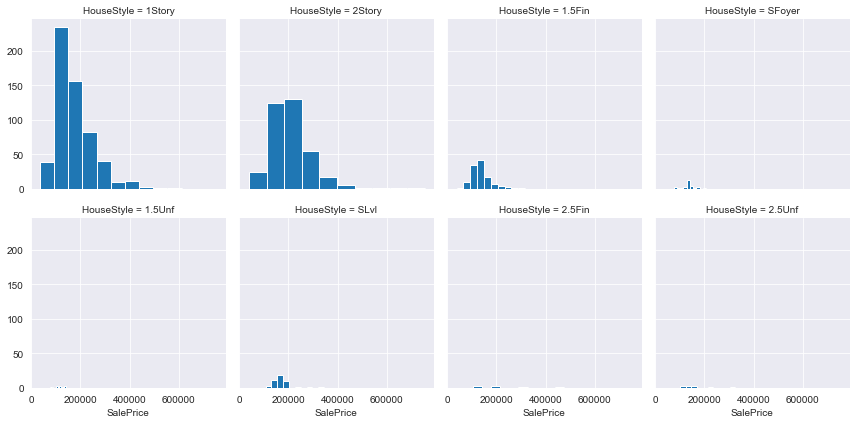

In [26]:
fig = sns.FacetGrid(df_new, col = 'HouseStyle', col_wrap = 4 )
fig.map(plt.hist, 'SalePrice');

**OBSERVATION**
* 1. HOUSESTYLE `1Story, 2story` has a widespread of saleprice when compared to other houses

**ANALYSIS ON SALEPRICE WITH CONDITION**

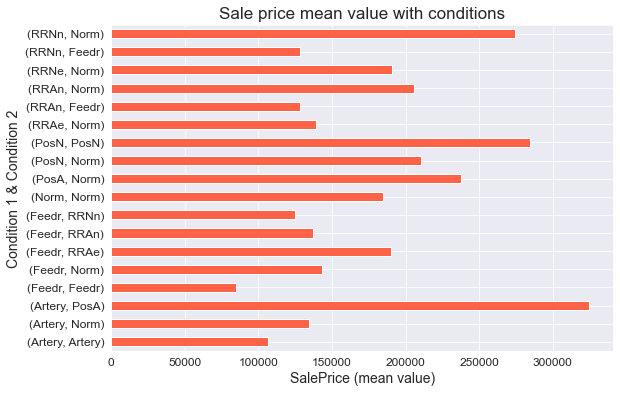

In [27]:
plt.figure(figsize = (9,6))
df_new.groupby(['Condition1', 'Condition2'])['SalePrice'].mean().plot(kind = 'barh',  color = 'tomato')
plt.xticks(fontsize = 12),
plt.yticks(fontsize = 12)
plt.title('Sale price mean value with conditions', fontsize = 17)
plt.ylabel('Condition 1 & Condition 2', fontsize = 14)
plt.xlabel('SalePrice (mean value)',fontsize = 14);

Conditions: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

**OBSERVATION**
* 1. Combination of conditions such as `Artery,PosA`, `posN,posN`, `RRNn, Norm` has the high mean value with sale price.
* 2. Combination of conditions such as `feedr, feedr` has the least mean value.

**ANALYSIS OF OVERALL CONDITION AND HOUSESTYLE WITH SALEPRICE**

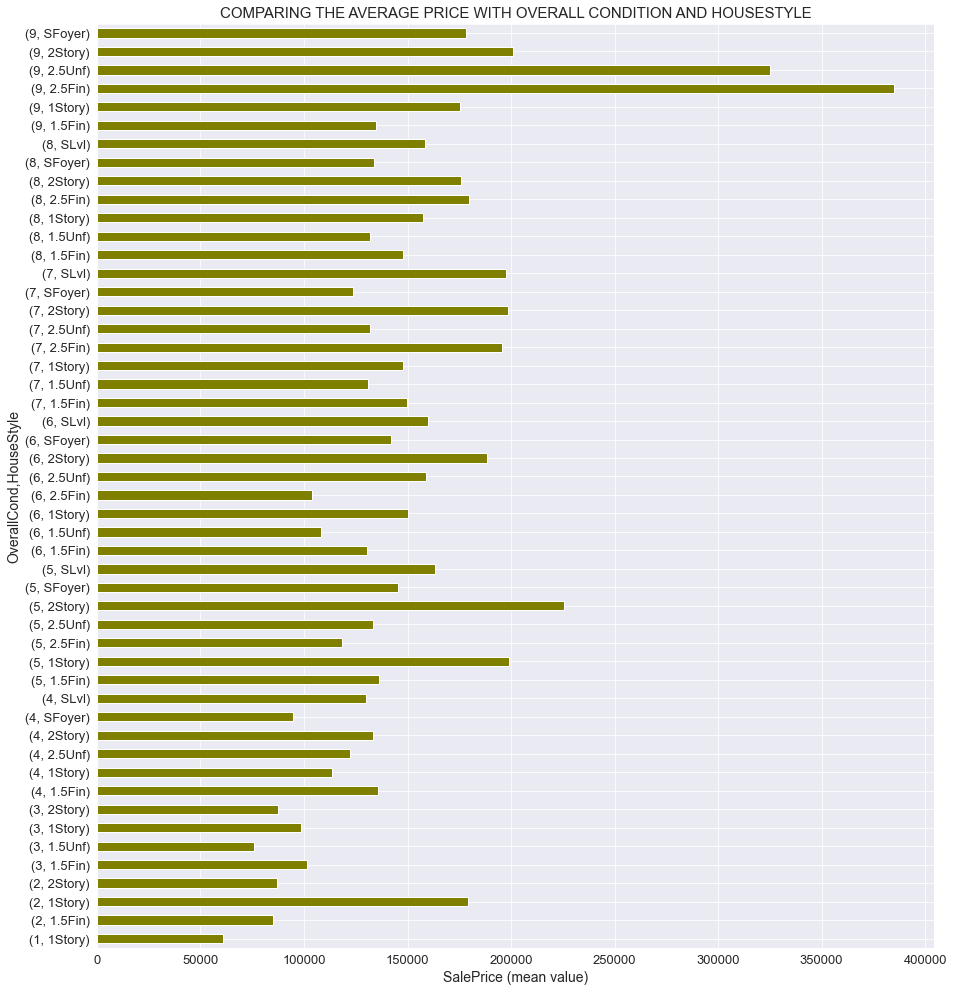

In [28]:
plt.figure(figsize = (15,17))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('SalePrice (mean value)',fontsize = 14)
plt.ylabel('Overall condition , HouseStyle', fontsize = 14)
plt.title('COMPARING THE AVERAGE PRICE WITH OVERALL CONDITION AND HOUSESTYLE', fontsize = 15)
df_new.groupby(['OverallCond', 'HouseStyle'])['SalePrice'].mean().plot.barh(color = 'olive');

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

**OBSERVATION**
* 1.In somecases overall condition < `5` has more mean value when compared to condition above `5`

**ANALYSIS OF HOUSES WHICH HAVE SOLD WITH HIGH PRICE WITH LOW CONDITIONS BECAUSE OF ZONE**

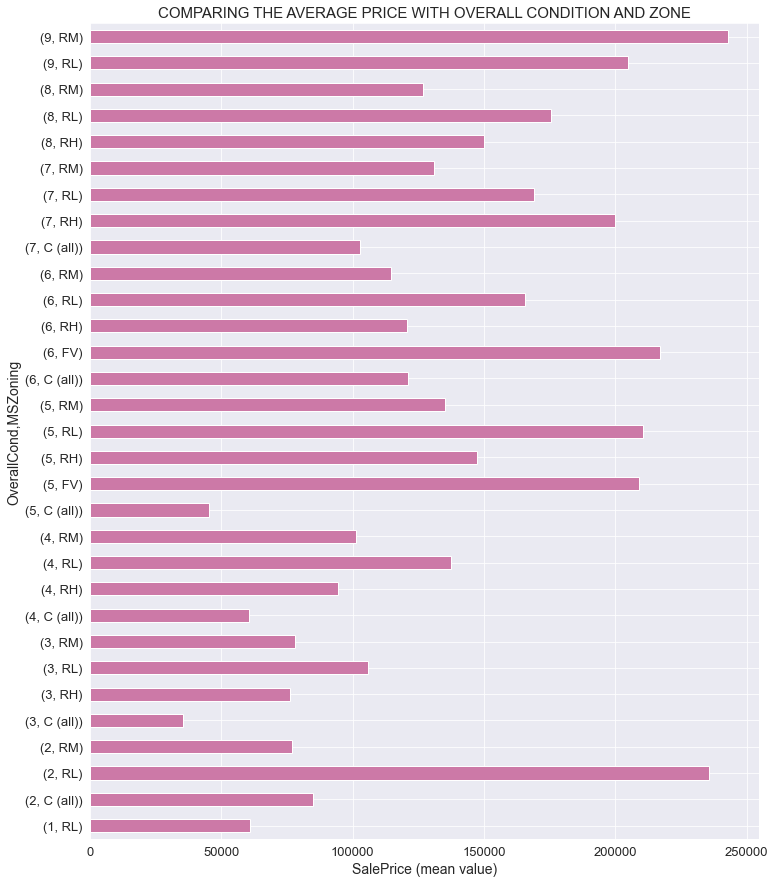

In [29]:
plt.figure(figsize = (12,15))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('SalePrice (mean value)',fontsize = 14)
plt.ylabel('Overall condition , Zone', fontsize = 14)
plt.title('COMPARING THE AVERAGE PRICE WITH OVERALL CONDITION AND ZONE', fontsize = 15)
df_new.groupby(['OverallCond', 'MSZoning'])['SalePrice'].agg('mean').plot.barh(color = '#CC79A7');

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OBSERVATION**
* 1. The zone `RL` has sold houses with high price though the overall condition is `low`

**IMPACT OF THE SALE PRICE WITH FEATURES**

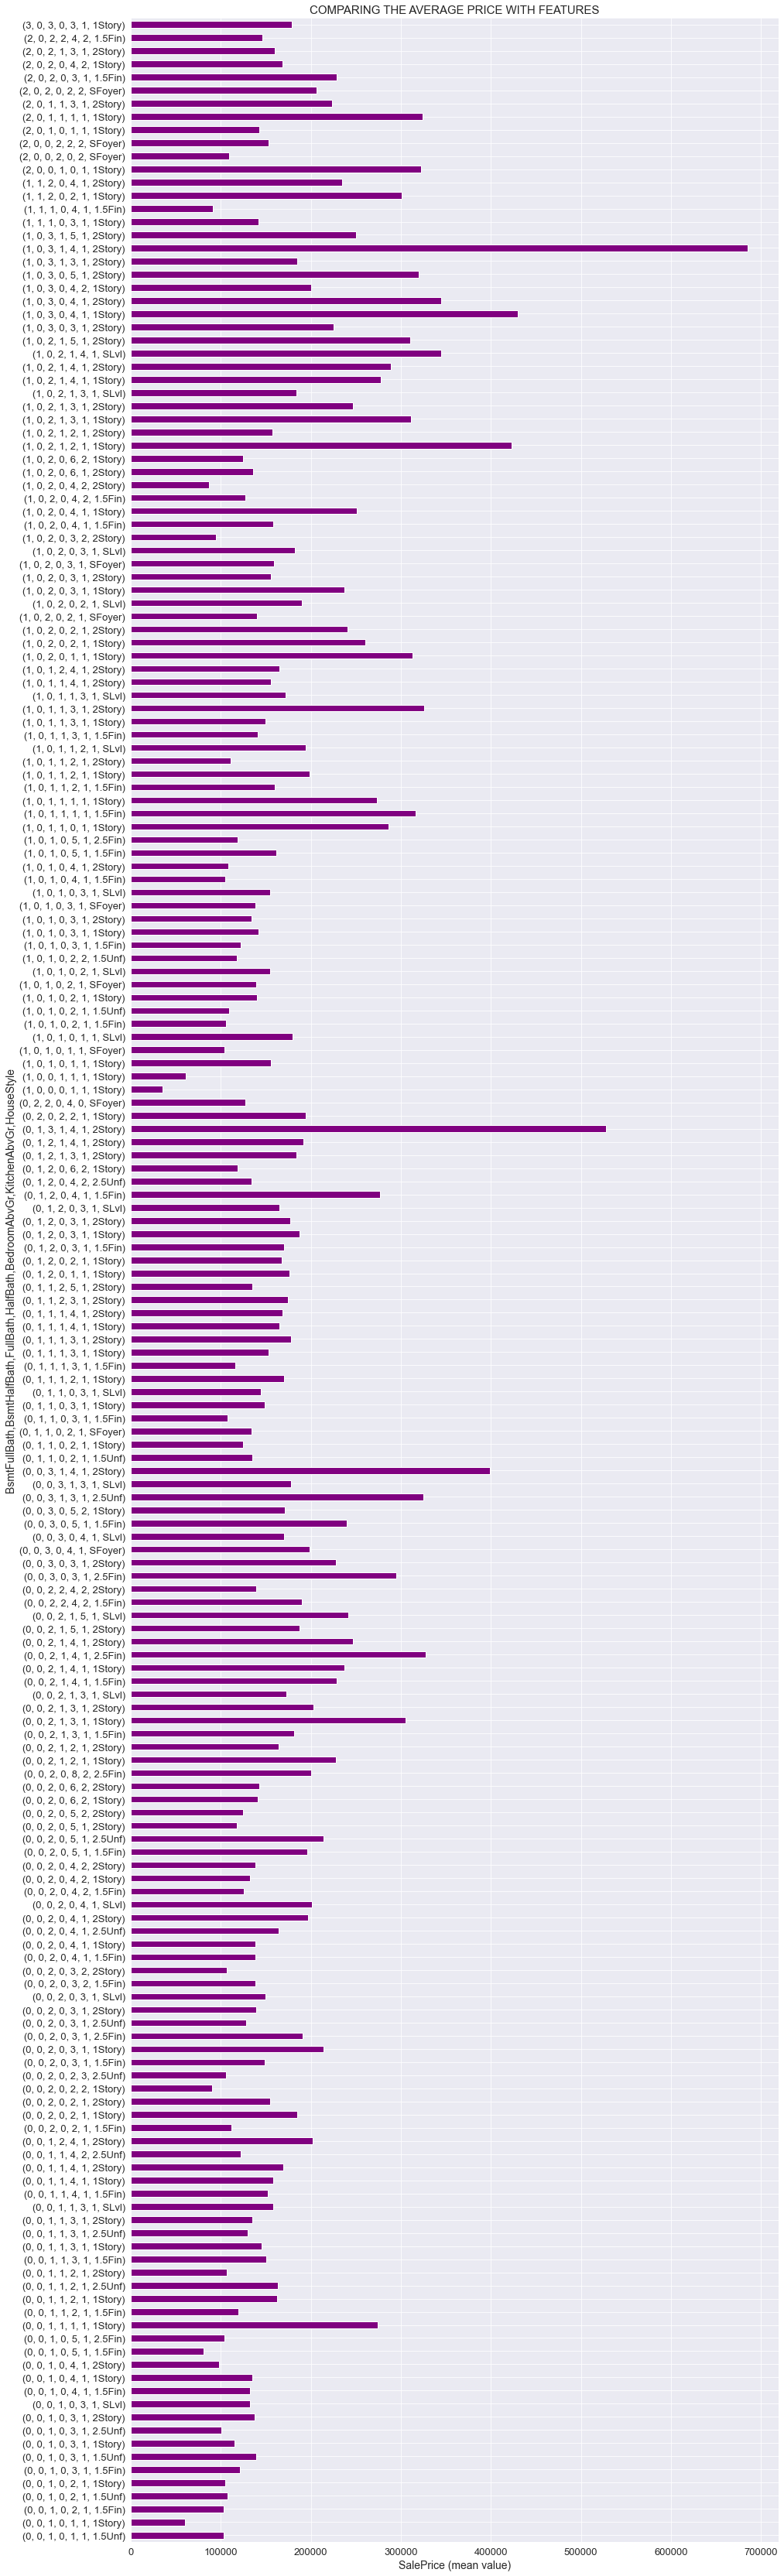

In [30]:
plt.figure(figsize = (15,60))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('SalePrice (mean value)',fontsize = 14)
plt.ylabel('Overall condition , Zone', fontsize = 14)
plt.title('COMPARING THE AVERAGE PRICE WITH FEATURES', fontsize = 15)
df_new.groupby(['BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr','HouseStyle'])['SalePrice'].mean().plot(kind = 'barh',color = 'purple');

**OBSERVATION**
* 1. The HouseStyle `2story` has  the `highest` average of sale price with features `1,0,3,1,4,1` (1 :BsmtFullBath, 0: BsmtHalfBath,3: FullBath, 1: HalfBath, 4: BedroomAbvGr, 1: KitchenAbvGr')
* 2. The HouseStyle `1story` has the `least` average of sale price with features `1,0,0,0,1,1` (1 :BsmtFullBath, 0: BsmtHalfBath,0: FullBath, 0: HalfBath, 0: BedroomAbvGr, 1: KitchenAbvGr')

**SEPARATING THE FEATURES INTO CATEGORICAL, NUMERICAL,TIMESERIES**

In [31]:
Categorical_features = list(df_new.select_dtypes(include = [np.object]).columns.values)
Numerical_features = list(df_new.select_dtypes(include = [np.number]).columns.values)
TimeSeriesfeatures = ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt','YearRemodAdd']

In [32]:
cat_features = pd.Series(df_new[Numerical_features].nunique().sort_values(),name = 'count').to_frame().query('count <= 15').index.values

In [33]:
Categorical_features.extend(cat_features)

In [34]:
for col in cat_features:
    if col in Numerical_features:
        Numerical_features.remove(col)
            

for col in TimeSeriesfeatures:
     if col in Numerical_features:
        Numerical_features.remove(col) 

In [35]:
df_new['GarageYrBlt'] = df_new['GarageYrBlt'].astype('int')

In [36]:
df_new['DateSold'] =  df_new['MoSold'].astype(str) + ' - ' +  df_new['YrSold'].astype(str)
df_new['DateSold'] = pd.to_datetime(df_new['DateSold'])

In [37]:
TimeSeriesfeatures.append('DateSold')

**PLOTTING THE NUMERICAL FEATURES**

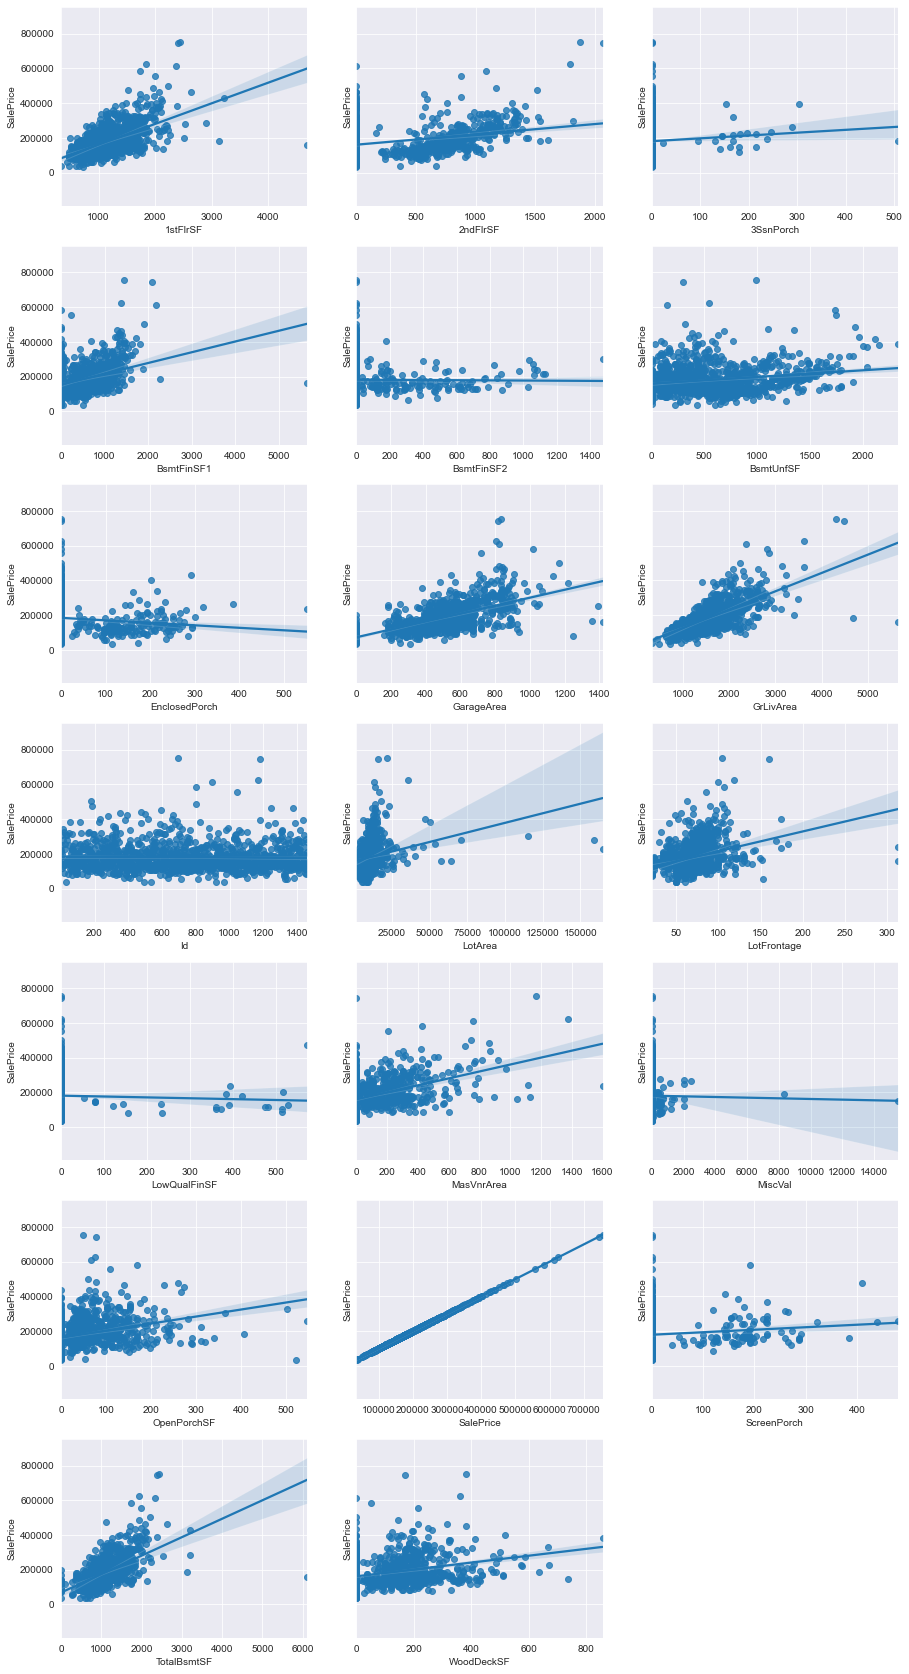

In [38]:
fig, ax = plt.subplots(math.ceil(len(Numerical_features)/3),3, sharey = True, figsize = (15, 30))
i,j = 0,0
for cols in sorted(Numerical_features):
    sns.regplot(cols, 'SalePrice', data = df_new, ax = ax[i][j] )
    if j == 2:
        j = 0
        i +=1
    else:
        j += 1
        
#removing the last box as it is not plotting anything
ax[6][2].set_visible(False)

**OBSERVATION**
* 1.It looks like features `1stflrSF, 3Ssnporch, BsmntFinSF1, GrlivArea, GarageArea, LotArea, OpenPOrchSF` have some outliers in them
* 2. Clearly it is seen how features has impact on sale price

**PLOTTING THE CATEGORICAL FEATURES**

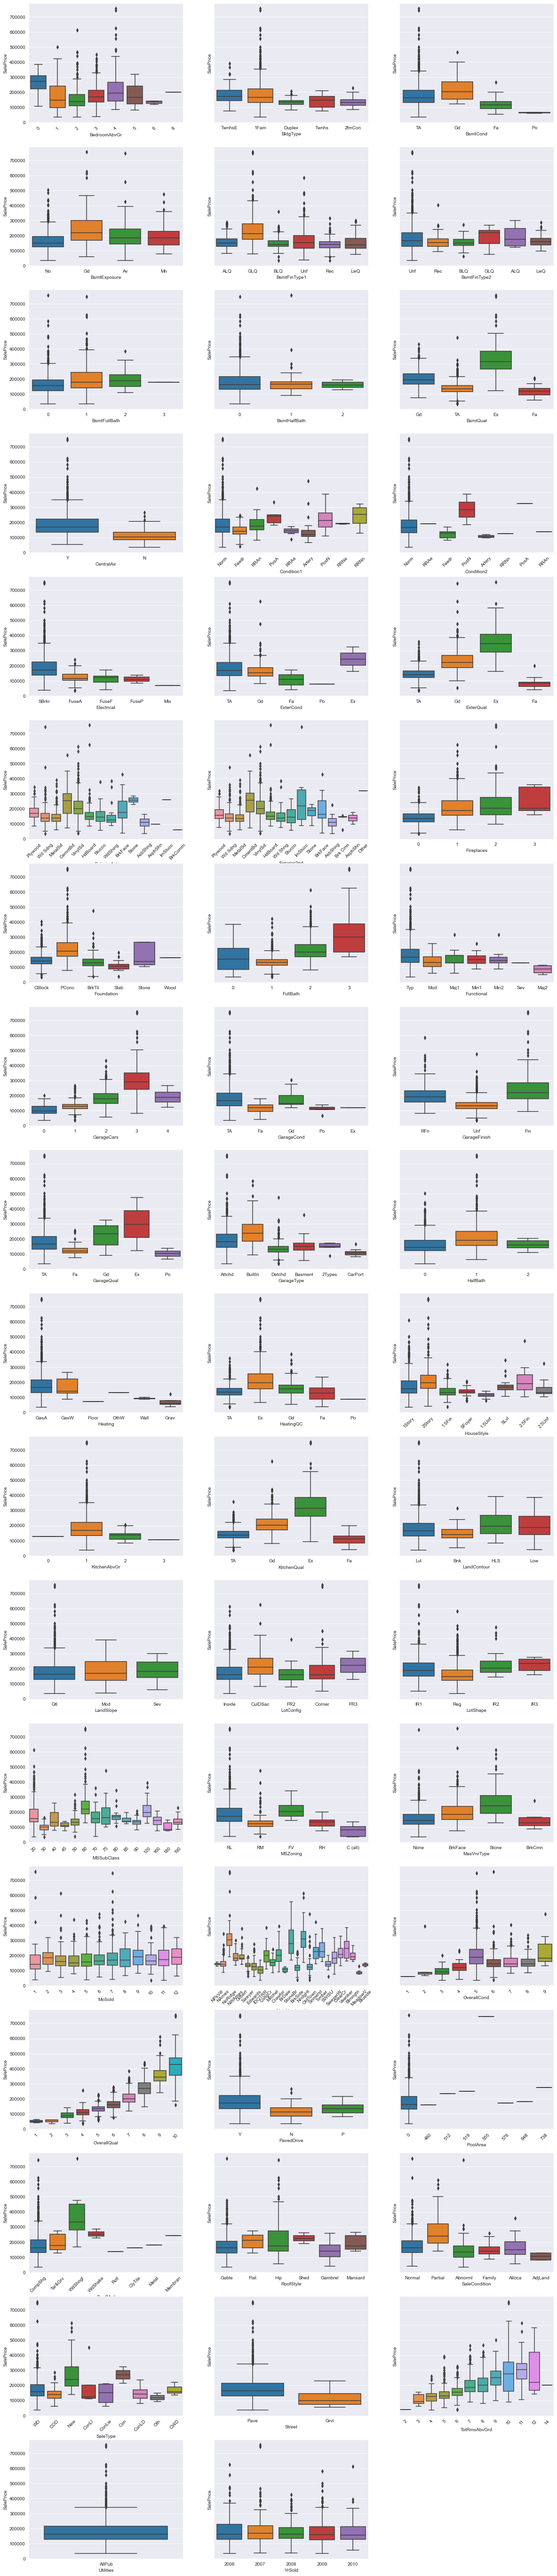

In [39]:
fig, ax = plt.subplots(math.ceil(len(Categorical_features)/3),3, figsize = (20, 100), sharey = True)
i, j = 0,0
for cols in sorted(Categorical_features):
    sns.boxplot(cols, 'SalePrice', data = df_new, ax = ax[i][j])
    
    if df_new[cols].nunique() > 7:
        ax[i][j].tick_params(axis = 'x', rotation = 45)
    
    if j == 2:
        j = 0
        i +=1
    else:
        j+=1
        
ax[17][2].set_visible(False) 

**OBSERVATION**
* 1. It is seen that some features have outliers in them

**PLOTTING THE TIMESERIES FEATURES**

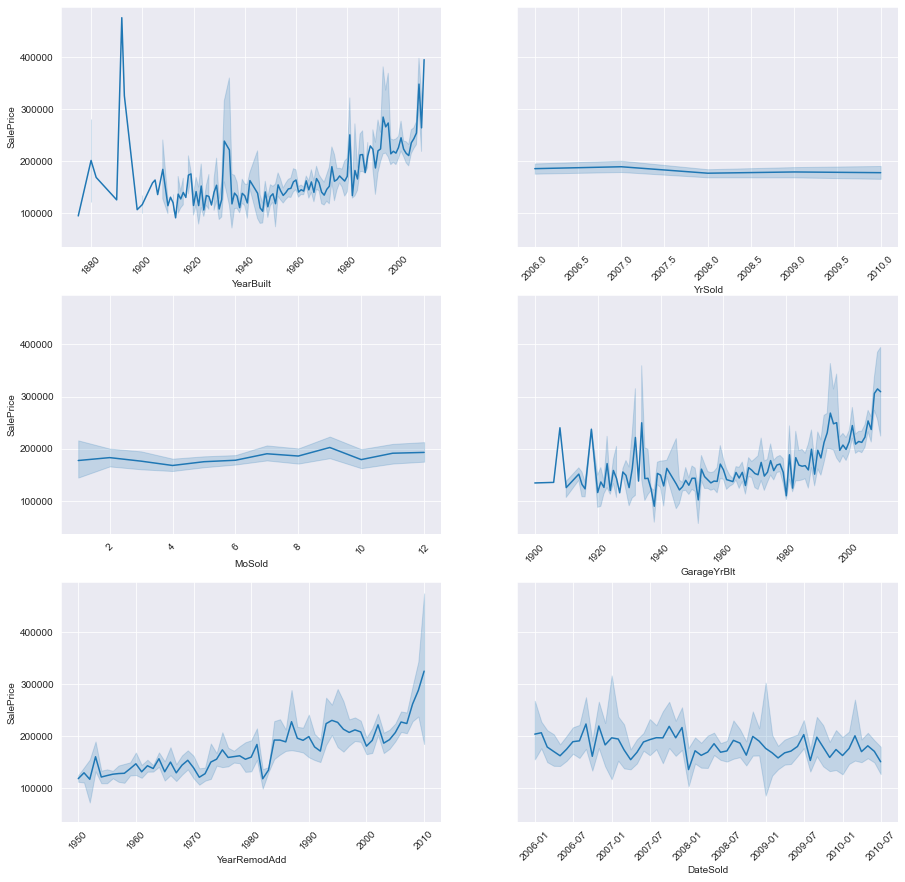

In [40]:
sns.set_style('darkgrid')
fig,ax= plt.subplots(math.ceil(len(TimeSeriesfeatures)/2),2, figsize = (15,15), sharey = True)
i, j = 0, 0 
for cols in df_new[TimeSeriesfeatures]:
    sns.lineplot(cols, 'SalePrice', data = df_new, ax = ax[i][j])
    ax[i][j].tick_params( axis = 'x', rotation = 45)
    if j == 1:
        j = 0
        i +=1
    else:
        j+=1

**OBSERVATION**
* 1. `SALEPRICE` gradually increases with the increase with `YearRemodAdd` and `YearBuilt`.

## FEATURE SELECTION

**CORRELATION**

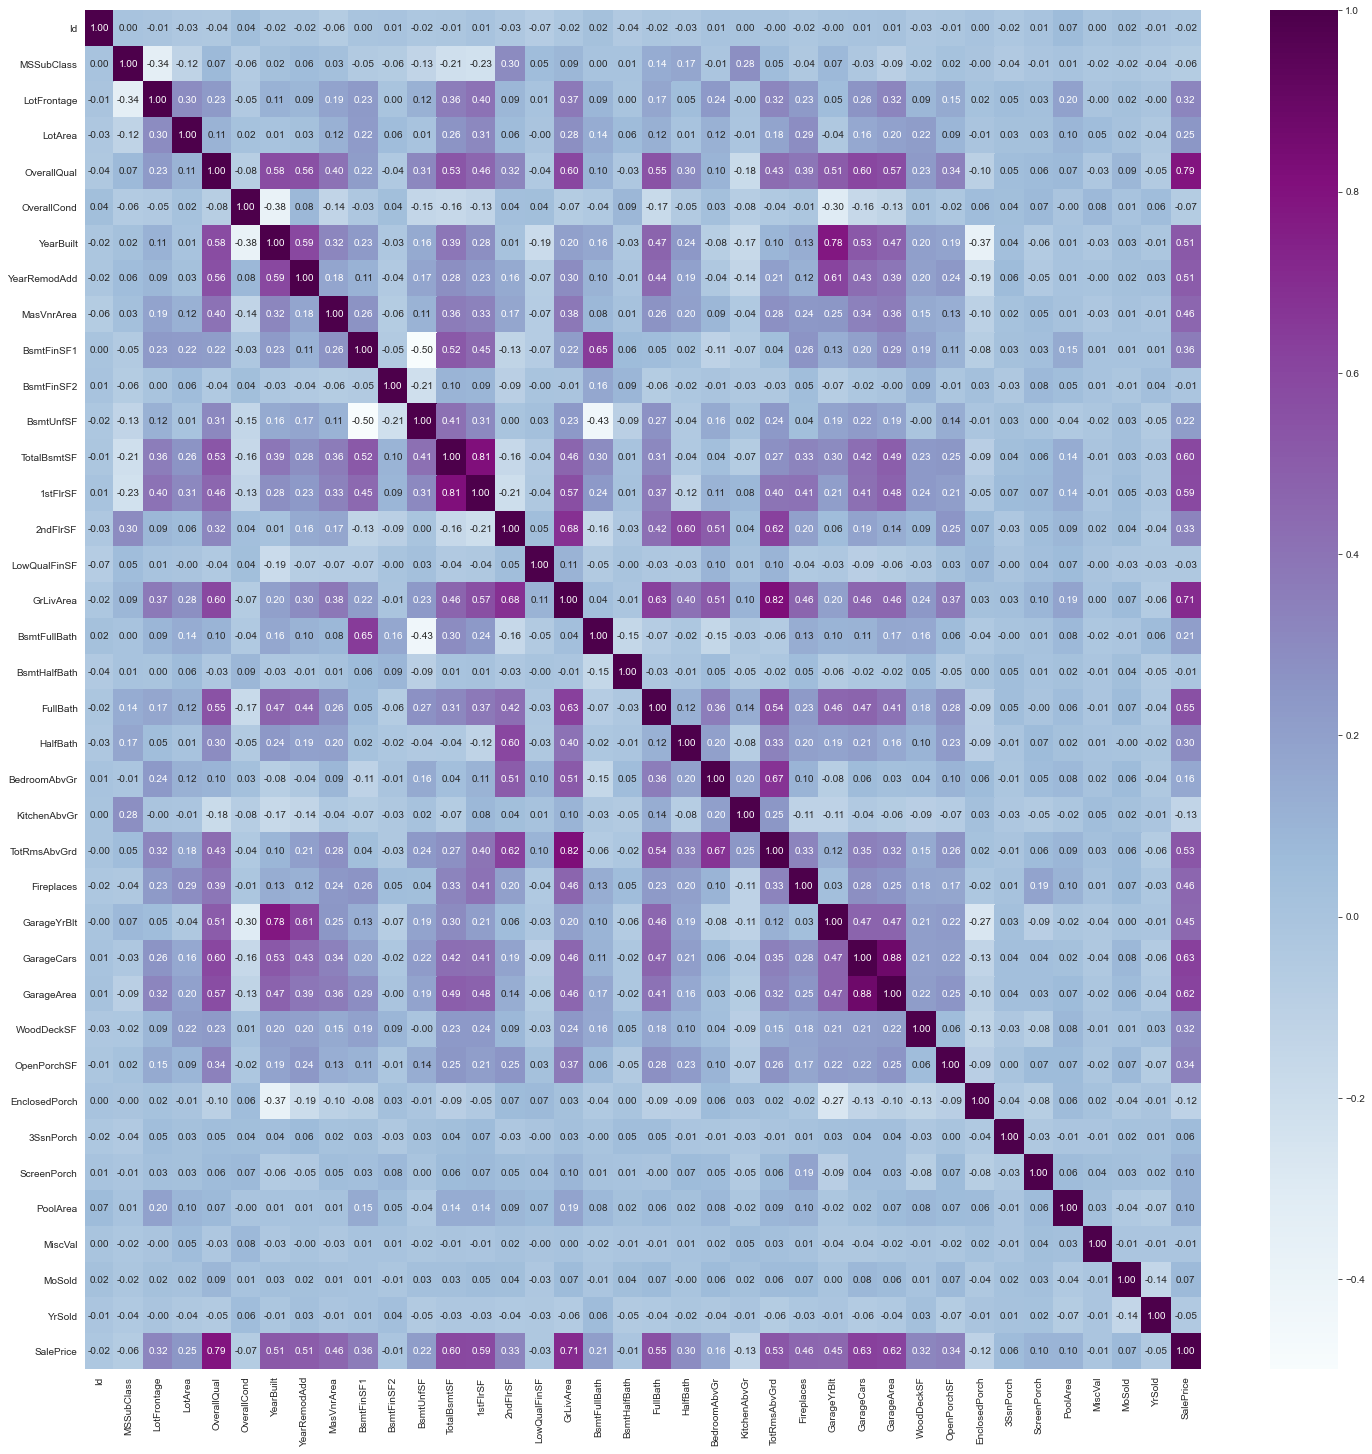

In [41]:
plt.figure(figsize = (25,25))
corr = df_new.corr()
sns.heatmap(corr,
           annot = True,
           fmt = '.2f',
           cmap = 'BuPu');

**OBSERVATION**
* 1. As we can see few columns are having high correlation between them we can drop that features

In [42]:
#dropping 'GarageCars' as it is correlated above 0.85 and `ID` has it has no pattern
df_new.drop(['GarageCars','Id'], axis = 1, inplace = True)

**AS WE HAVE COLUMNS IN CATEGORICAL DTYPE LETS CONVERT THEM INTO NUMERICAL FEATURES IN ORDER TO GIVE THAT TO MODEL**



In [43]:
le = LabelEncoder()

#creating function for converting the features into numerical
def convert_features(data):
    """
    Converts the categorical features into numerical features
    """
    for cols in data.columns:
        if not pd.api.types.is_numeric_dtype(data[cols]):
            data[cols] = le.fit_transform(data[cols])
    return data  

In [44]:
df_new = convert_features(df_new)

In [64]:
pd.set_option('display.max_rows', 75)
df_new.T

,0,1,2,3,4,5,6,7,8,9,...,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167
MSSubClass,120.0,20.0,60.0,20.0,20.0,60.0,20.0,20.0,20.0,50.0,...,20.0,90.0,120.0,60.0,30.0,20.0,20.0,160.0,70.0,60.0
MSZoning,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0
LotFrontage,70.0,95.0,92.0,105.0,70.0,58.0,70.0,88.0,70.0,80.0,...,70.0,42.0,53.0,70.0,45.0,70.0,67.0,24.0,50.0,70.0
LotArea,4928.0,15865.0,9920.0,11751.0,16635.0,14054.0,11341.0,13125.0,9170.0,8480.0,...,11250.0,7711.0,4043.0,10762.0,8212.0,9819.0,8777.0,2280.0,8500.0,7861.0
Street,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LotShape,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,0.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0
LandContour,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Utilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotConfig,4.0,4.0,1.0,4.0,2.0,4.0,4.0,0.0,0.0,4.0,...,4.0,4.0,4.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0
LandSlope,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   int32  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   int32  
 5   LotShape       1168 non-null   int32  
 6   LandContour    1168 non-null   int32  
 7   Utilities      1168 non-null   int32  
 8   LotConfig      1168 non-null   int32  
 9   LandSlope      1168 non-null   int32  
 10  Neighborhood   1168 non-null   int32  
 11  Condition1     1168 non-null   int32  
 12  Condition2     1168 non-null   int32  
 13  BldgType       1168 non-null   int32  
 14  HouseStyle     1168 non-null   int32  
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [47]:
df_new.to_csv('Housing _data_for_modelling.csv')